<a href="https://colab.research.google.com/github/leandrobarbieri/python-datascience-ml/blob/main/KNN_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - Nearest Neighbors
- Compara as distancias relativas aos conjuntos de parametros de entrada
- Guarda os dados
- Organiza em ordem crescente
- Classifica de acordo com a maioria dos vizinhos
- Precisa normalizar os dados
- Melhor com muitas classes
- Não funciona bem com dados categoricos (melhor numéricos) <br>
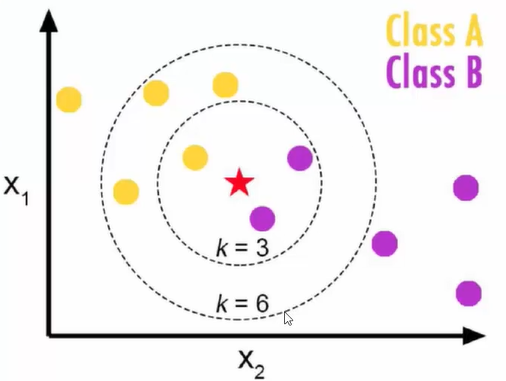

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# definir a primeira coluna como indice "index_col = 0"
df = pd.read_csv("https://raw.githubusercontent.com/leandrobarbieri/python-datascience-ml/main/5.%20Machine%20Learning/K-Nearest-Neighbors/Classified%20Data", index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
df["TARGET CLASS"].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

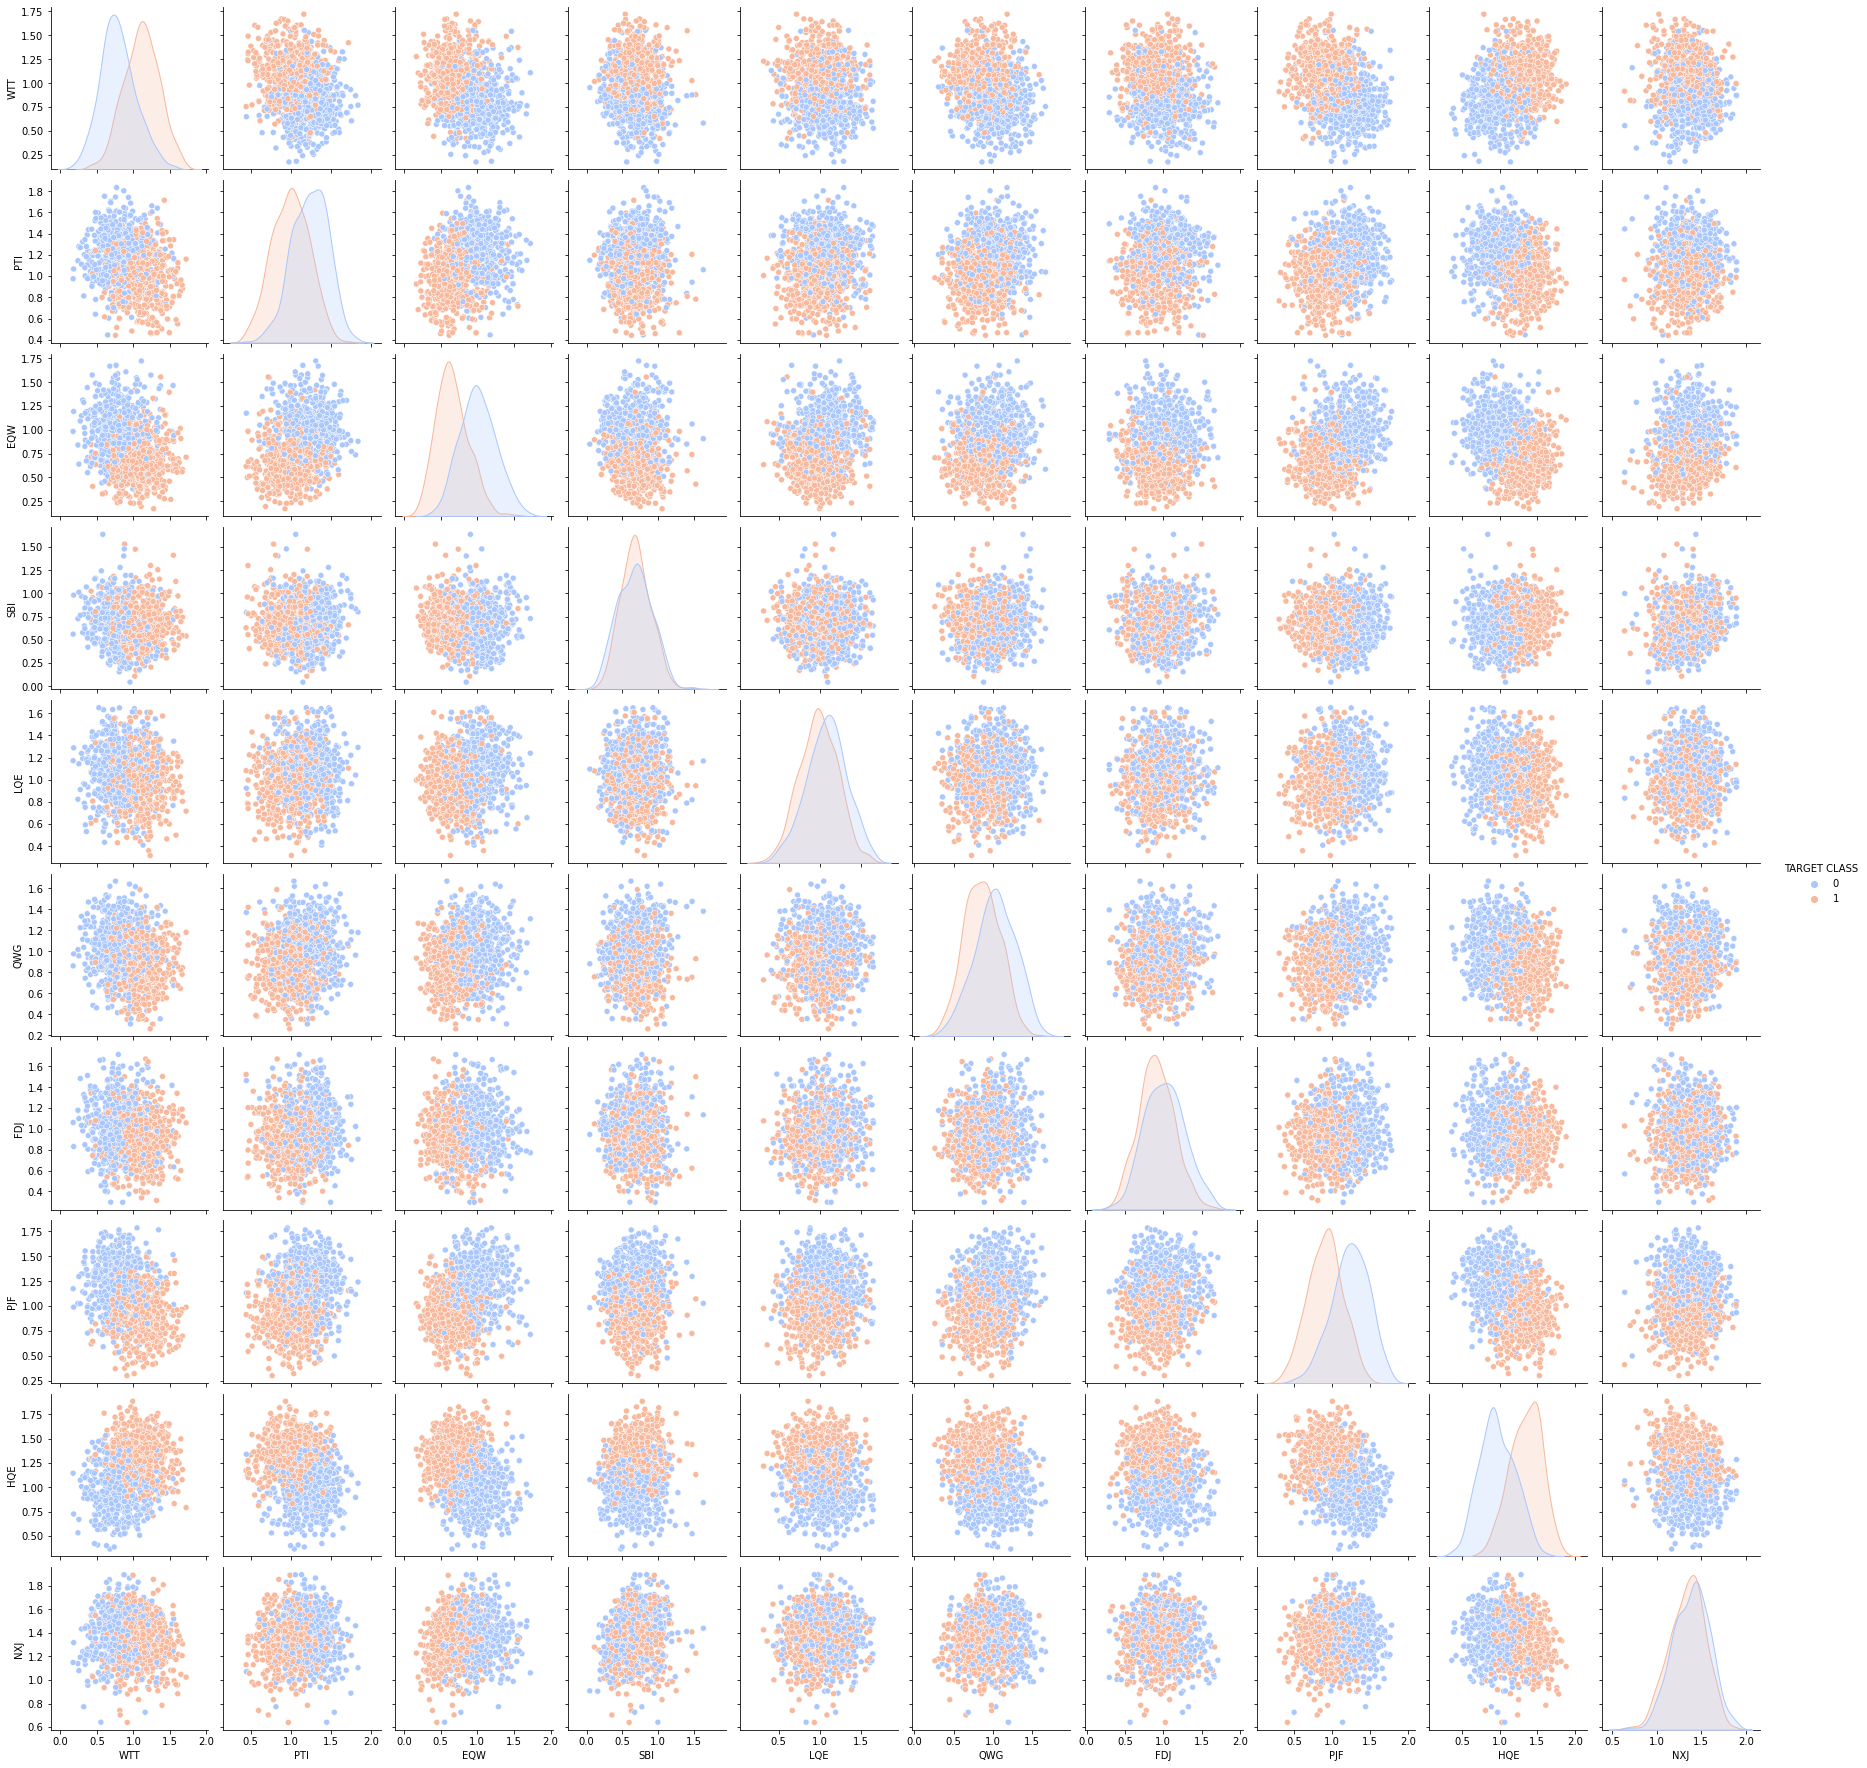

In [18]:
# em algumas combinações de atributos as classes são visualmente separaveis 
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

# Normalizar os dados

In [4]:
# Normalização dos dados: O algoritimo KNN leva em consideração do valor para 
# fazer as aproximações portanto se estivem em escalas muito diferentes os resultados 
# podem ser distorcidos, odas as variáveis que estão em grande escala terão um 
# efeito muito maior na distância entre as observações e, portanto, sobre o 
# classificador KNN, do que as variáveis em pequena escala.

from sklearn.preprocessing import StandardScaler

# Crie um objeto StandardScaler() chamado scaler
scaler = StandardScaler()

# Use o método fit() do objeto para treinar o modelo de normalização
scaler.fit(df.drop('TARGET CLASS', axis=1))

# Use o método .transform () para transformar os parâmetros em uma versão padronizada
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [5]:
# Padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou
# todas as colunas exceto a última TARGET
dados = pd.DataFrame(scaled_features, columns=df.columns[:-1])
dados

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


# Divisão treino teste

In [6]:
from sklearn.model_selection import train_test_split

# train_test_split para dividir seus dados em um conjunto treino e teste
X_train, X_test, y_train, y_test = train_test_split(dados, df["TARGET CLASS"], test_size=0.3)

# Previsões e Avaliação

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crie uma instância do modelo KNN com n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors = 1)

# Ajuste este modelo KNN aos dados de treinamento
knn.fit(X_train, y_train)

# Previsão dos valores usando seu modelo KNN e X_test
pred = knn.predict(X_test)

In [8]:
# matriz de confusão: https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
print(confusion_matrix(y_test, pred))

[[130  18]
 [ 10 142]]


In [9]:
# classification report: https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       148
           1       0.89      0.93      0.91       152

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Escolhendo um valor K
Método do cotovelo

In [10]:
error_rate = []

# Simula o treinamento em vário tamanhos de n_neighbors
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

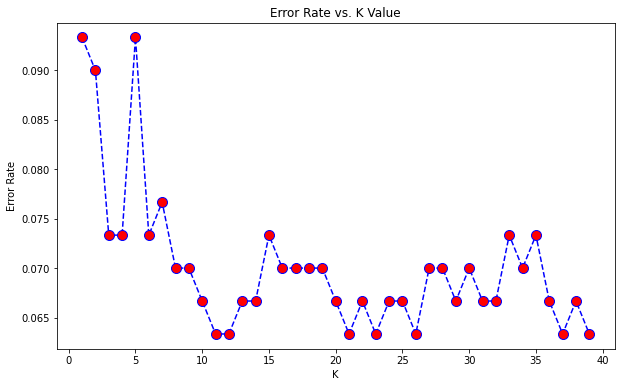

In [11]:
# Escolher o K onde a quatidade de erro é menor 
# ou o ponto onde tende a não reduzir mais
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
# Testando com K=11

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[136  12]
 [  7 145]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       148
           1       0.92      0.95      0.94       152

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

